In [32]:
import random
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [126]:
dataset, _ = make_blobs(n_samples=200,
                        n_features=2,
                        centers=4,
                        cluster_std=0.5,
                        random_state=0)

df = pd.DataFrame(dataset, columns=['var1', 'var2'])

df.head()

,var1,var2
0,2.204387,1.560857
1,-1.133740,2.684673
2,1.064983,4.102897
3,-2.376038,7.324207
4,1.682890,0.484444


In [189]:
df.shape

(200, 2)

In [127]:
scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)

In [186]:
def euclidean_distance(point, centroid) -> float:
    distance = np.sum((point - centroid)**2)
    return distance

In [185]:
def recalculate_centroids(cluster_points) -> float:
    return np.mean(cluster_points, axis=0)

In [184]:
def closest_cluster(point, centroids) -> tuple:
    min_dist = np.inf
    for i, centroid in enumerate(centroids):
        
        distance = euclidean_distance(point, centroid)
        
        if distance < min_dist:
            min_dist = distance
            cluster_label = i
            
    return (min_dist, cluster_label)

In [179]:
def KMeans(
           points: np.ndarray,
           n_clusters: int=4, 
           max_iter: int =100, 
           random_state: int=123):
    
    """
    points : Data points needs to be clustered
    n_clusters : No of clusters default: 4
    max_iter: No of iterations need to iterate default: 100
    random_state: set the seed for reproducibility default: 123
    """
    
    np.random.seed(random_state)
    
    n = points.shape[0]
    
    #calculate random centroid index
    random_centroid_index = np.random.randint(0, n, n_clusters)
    
    centroids = points[random_centroid_index]
    
    points_to_cluster = [0] * n
    
    cluster_to_points = [[] for _ in range(n_clusters)]
    
    for _ in range(max_iter):
         
        old_centroids = centroids.copy()
        
        for idx in range(n):
            #it calculates every data points to the nearest centroid
            _ , label = closest_cluster(points[idx], centroids)
            points_to_cluster[idx] = label
            cluster_to_points[label].append(idx)
        
        #recalculate the centroids
        for idx, cluster in enumerate(cluster_to_points):
            centroids[idx] = recalculate_centroids(points[cluster])
            
        current_centroids = centroids.copy()
        
        is_converged: bool= True
        
        #criterion that controls the minimum change in cluster centers
        if abs(np.sum(old_centroids - current_centroids))==0:
            is_converged = False

        if is_converged:
            break
            
    return np.array(points_to_cluster), current_centroids
        

In [180]:
predicted, cluster_centers = KMeans(X)

In [181]:
colormap = np.array(['r','g','b','y'])

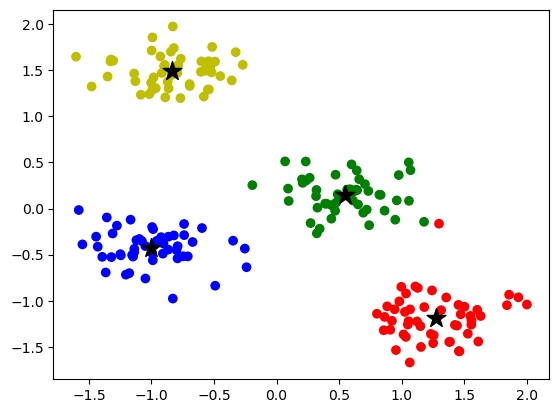

In [188]:
plt.scatter(X[:,0], X[:,1], c=colormap[predicted])
plt.scatter(cluster_centers[0][0],cluster_centers[0][1], s=200, c='black', marker='*')
plt.scatter(cluster_centers[1][0],cluster_centers[1][1], s=200, c='black', marker='*')
plt.scatter(cluster_centers[2][0],cluster_centers[2][1], s=200, c='black', marker='*')
plt.scatter(cluster_centers[3][0],cluster_centers[3][1], s=200, c='black', marker='*')
plt.show()
